# Analyse en composantes principales  
Découvrez de nouvelles fonctionnalités en analysant les variations.  

### Introduction
Dans la leçon précédente, nous avons exploré notre première méthode basée sur un modèle pour l'ingénierie des fonctionnalités : **le regroupement (clustering)**. Dans cette leçon, nous nous intéressons à la suivante : **l'analyse en composantes principales (ACP ou PCA)**. Tout comme le clustering consiste à diviser le jeu de données en fonction de la proximité, vous pouvez considérer la PCA comme une partition de la variation des données. La PCA est un excellent outil pour vous aider à découvrir des relations importantes dans les données et peut également être utilisée pour créer des fonctionnalités plus informatives.  

*(Note technique : la PCA est généralement appliquée à des données standardisées. Avec des données standardisées, la "variation" signifie "corrélation". Avec des données non standardisées, la "variation" signifie "covariance". Toutes les données de ce cours seront standardisées avant l'application de la PCA.)*

---

### Analyse en composantes principales  
Dans le jeu de données "Abalone", nous trouvons des mesures physiques recueillies sur plusieurs milliers d'ormaux de Tasmanie. *(Un ormeau est une créature marine semblable à une palourde ou une huître.)* Pour l’instant, nous examinerons uniquement quelques caractéristiques : la **"Hauteur"** et le **"Diamètre"** de leurs coquilles.  

Vous pourriez imaginer que dans ces données, il existe des **"axes de variation"** qui décrivent les façons dont les ormeaux diffèrent généralement les uns des autres. Visuellement, ces axes apparaissent comme des lignes perpendiculaires qui longent les dimensions naturelles des données, un axe pour chaque caractéristique originale.  

Souvent, nous pouvons donner des noms à ces axes de variation. L'axe le plus long pourrait être appelé **"Taille"** : faible hauteur et faible diamètre (en bas à gauche) opposés à grande hauteur et grand diamètre (en haut à droite). L'axe le plus court pourrait être appelé **"Forme"** : faible hauteur et grand diamètre (forme plate) opposés à grande hauteur et faible diamètre (forme ronde).  

Remarquez qu'au lieu de décrire les ormeaux par leur **Hauteur** et leur **Diamètre**, nous pourrions tout aussi bien les décrire par leur **Taille** et leur **Forme**. En fait, c’est toute l’idée de la PCA : au lieu de décrire les données avec les caractéristiques originales, nous les décrivons avec leurs axes de variation. Ces axes de variation deviennent les **nouvelles caractéristiques**.  

Les composantes principales deviennent les nouvelles caractéristiques en effectuant une rotation des données dans l'espace des caractéristiques. Les nouvelles caractéristiques construites par la PCA sont en réalité des combinaisons linéaires *(sommes pondérées)* des caractéristiques originales :  

```python
df["Taille"] = 0.707 * X["Hauteur"] + 0.707 * X["Diamètre"]
df["Forme"] = 0.707 * X["Hauteur"] - 0.707 * X["Diamètre"]
```

Ces nouvelles caractéristiques sont appelées les **composantes principales** des données. Les poids eux-mêmes sont appelés **coefficients de charge**. Le nombre de composantes principales est égal au nombre de caractéristiques du jeu de données original : si nous avions utilisé dix caractéristiques au lieu de deux, nous aurions obtenu dix composantes.  

Les coefficients de charge d’une composante indiquent quelle variation elle exprime à travers les signes et les magnitudes :

| Caractéristiques \ Composantes | Taille (PC1) | Forme (PC2) |
|--------------------------------|--------------|-------------|
| Hauteur                        | 0.707        | 0.707       |
| Diamètre                       | 0.707        | -0.707      |

Cette table de coefficients indique que dans la composante **Taille**, la Hauteur et le Diamètre varient dans la même direction *(même signe)*, mais dans la composante **Forme**, ils varient dans des directions opposées *(signe opposé)*. Dans chaque composante, les coefficients ont tous la même magnitude, donc les caractéristiques contribuent également aux deux.  

La PCA nous informe également de la quantité de variation dans chaque composante. Nous pouvons voir que les données varient davantage le long de la composante **Taille** que le long de la composante **Forme**. La PCA quantifie cela grâce au **pourcentage de variance expliquée** par chaque composante.  

---

#### Application pratique et bonnes pratiques  
L’ACP peut être utilisée pour réduire la dimensionnalité, détecter des anomalies, réduire le bruit ou encore décorréler des variables fortement corrélées.  

Exemple avec les données automobiles :  
En standardisant des variables comme la consommation, la taille du moteur ou le poids, on peut détecter des axes principaux (comme le contraste entre les voitures luxueuses et économiques) et créer des nouvelles métriques prédictives pour le prix.


---

### PCA pour l’ingénierie des caractéristiques

Il existe deux façons d’utiliser l’Analyse en Composantes Principales (ACP ou PCA) pour l’ingénierie des caractéristiques.

#### 1. **Utilisation comme technique descriptive**  
Les composantes principales décrivent les variations dans les données. Vous pourriez calculer les scores d’information mutuelle (**MI scores**) pour les composantes et identifier quel type de variation est le plus prédictif de votre cible. Cela peut vous donner des idées pour créer de nouvelles caractéristiques :  

- Par exemple, si la variation liée à la **taille** est importante, vous pourriez créer un **produit** entre "Hauteur" et "Diamètre".  
- Si la **forme** est importante, vous pourriez créer un **rapport** entre "Hauteur" et "Diamètre".  
- Vous pourriez également appliquer un **clustering** sur une ou plusieurs composantes principales ayant des scores élevés.

#### 2. **Utilisation directe des composantes comme caractéristiques**  
Comme les composantes principales exposent directement la structure de variation des données, elles peuvent souvent être plus informatives que les caractéristiques d’origine. Voici quelques cas d’utilisation :

- **Réduction de dimensionnalité** : Lorsque vos caractéristiques sont fortement redondantes (**multicolinéaires**, en particulier), l’ACP regroupe cette redondance dans une ou plusieurs composantes avec une variance proche de zéro. Vous pouvez alors supprimer ces composantes puisqu’elles contiennent peu ou pas d’information utile.  

- **Détection d’anomalies** : Les variations inhabituelles, qui ne sont pas apparentes dans les caractéristiques d’origine, apparaîtront souvent dans les composantes de faible variance. Ces composantes peuvent être très utiles pour détecter des anomalies ou des valeurs aberrantes.  

- **Réduction du bruit** : Une série de relevés de capteurs peut souvent contenir un bruit de fond commun. L’ACP peut regrouper le signal informatif dans un nombre réduit de caractéristiques, tout en laissant le bruit à part, augmentant ainsi le rapport signal/bruit.  

- **Décorrélation** : Certains algorithmes de machine learning rencontrent des difficultés avec des caractéristiques très corrélées. L’ACP transforme les caractéristiques corrélées en composantes non corrélées, ce qui peut faciliter le travail de votre algorithme.  

En résumé, l’ACP vous donne un accès direct à la structure de corrélation de vos données. Vous trouverez certainement vos propres applications à cet outil !

---

### **Bonnes pratiques avec l’ACP**

Voici quelques éléments à garder à l’esprit lorsque vous appliquez l’ACP :

1. **L’ACP ne fonctionne qu’avec des caractéristiques numériques**, comme des quantités continues ou des comptes.  
2. **L’ACP est sensible à l’échelle des données.** Il est recommandé de standardiser vos données avant d’appliquer l’ACP, sauf si vous avez une bonne raison de ne pas le faire.  
3. **Prenez en compte les valeurs aberrantes.** Elles peuvent avoir une influence excessive sur les résultats. Envisagez de les supprimer ou de limiter leur impact.

---

# Exemple - Automobiles de 1985
Dans cet exemple, nous allons revenir à notre dataset sur les automobiles et appliquer l'ACP en tant que **technique descriptive** pour découvrir des caractéristiques. Nous examinerons d'autres cas d'utilisation dans l'exercice.

### Chargement des données et définition des fonctions
Le script suivant charge les données et définit deux fonctions : **plot_variance** (pour visualiser la variance expliquée par les composantes principales) et **make_mi_scores** (pour calculer les scores d'information mutuelle).

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression

plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

def plot_variance(pca, width=8, dpi=100):
    # Création de la figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Variance expliquée
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Composante", title="% Variance expliquée", ylim=(0.0, 1.0)
    )
    # Variance cumulée
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Composante", title="% Variance cumulée", ylim=(0.0, 1.0)
    )
    # Configuration de la figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="Scores MI", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


### Préparation des données
Le dataset des automobiles de 1985 est chargé et quatre caractéristiques représentatives sont sélectionnées : elles couvrent différentes propriétés et ont des scores d'information mutuelle élevés avec la cible, le prix. Les données sont standardisées, car les caractéristiques ont des échelles différentes.


In [13]:
df = pd.read_csv("autos.csv")

features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardisation
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
X_scaled.head()

,highway_mpg,engine_size,horsepower,curb_weight
0,-0.555613,0.045098,0.198054,-0.025646
1,-0.555613,0.045098,0.198054,-0.025646
2,-0.702307,0.574066,1.330822,0.496473
3,-0.115531,-0.459826,-0.039037,-0.426254
4,-1.289083,0.189362,0.303427,0.498371


---

### Application de l'ACP
Nous ajustons l'estimateur PCA de *scikit-learn* pour créer les composantes principales. Voici les premières lignes du dataset transformé :

In [17]:
from sklearn.decomposition import PCA

# Création des composantes principales
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Conversion en DataFrame
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


---

### Les "loadings" de l'ACP
Après ajustement, l'instance PCA contient les "loadings" (chargements) dans son attribut components_. Nous convertissons ces valeurs en DataFrame pour les rendre plus lisibles. Les colonnes représentent les composantes principales (PC), tandis que les lignes représentent les caractéristiques originales.

In [20]:
loadings = pd.DataFrame(
    pca.components_.T,  # transposition de la matrice des "loadings"
    columns=component_names,  # les colonnes sont les composantes principales
    index=X.columns,  # les lignes sont les caractéristiques originales
)
loadings


,PC1,PC2,PC3,PC4
highway_mpg,-0.492347,0.770892,0.070142,-0.397996
engine_size,0.503859,0.626709,0.019960,0.594107
horsepower,0.500448,0.013788,0.731093,-0.463534
curb_weight,0.503262,0.113008,-0.678369,-0.523232


#### Interprétation
Les signes et les magnitudes des "loadings" d’une composante révèlent le type de variation capturé. Par exemple :

- La première composante (PC1) montre un contraste entre les véhicules **grands et puissants consommant beaucoup d'essence** et les véhicules **petits et économiques**. On pourrait l’appeler l’axe "Luxe/Économie".
---
La figure suivante montre que les quatre caractéristiques choisies varient principalement le long de cet axe "Luxe/Économie".

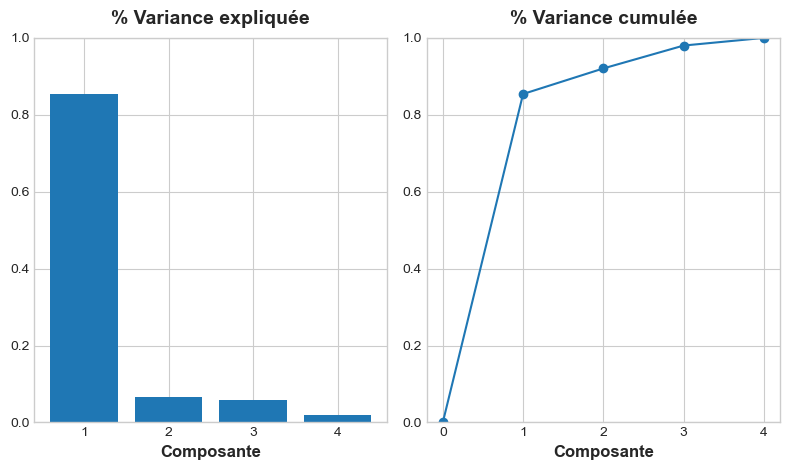

In [23]:
# Visualiser la variance expliquée
plot_variance(pca);

---
### Scores d'Information Mutuelle (MI)
Observons les scores d’information mutuelle des composantes principales. Sans surprise, **PC1** est très informatif. Cependant, les composantes restantes, malgré leur faible variance, entretiennent toujours une relation significative avec le prix. Il pourrait être intéressant d'examiner ces composantes pour identifier des relations non capturées par l’axe principal "Luxe/Économie".

In [28]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores


PC1    1.014374
PC2    0.379637
PC3    0.306898
PC4    0.205133
Name: Scores MI, dtype: float64

---
### Analyse de la troisième composante (PC3)
La troisième composante (PC3) met en évidence un contraste entre la **puissance**(horsepower) et le **poids à vide** (curb_weight). Cela semble différencier les voitures sportives des breaks (wagons).

Examinons les données triées par PC3 pour explorer ce contraste :

In [32]:
# Trier les données par PC3
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body_style", "horsepower", "curb_weight"]
df.loc[idx, cols]


,make,body_style,horsepower,curb_weight
118,porsche,hardtop,207,2756
117,porsche,hardtop,207,2756
119,porsche,convertible,207,2800
45,jaguar,sedan,262,3950
96,nissan,hatchback,200,3139
...,...,...,...,...
59,mercedes-benz,wagon,123,3750
61,mercedes-benz,sedan,123,3770
101,peugot,wagon,95,3430
105,peugot,wagon,95,3485


---
### Création d'une nouvelle caractéristique : Ratio "Sports ou Wagon"
Pour capturer ce contraste, nous créons une nouvelle caractéristique : le ratio entre le poids à vide (curb_weight) et la puissance (horsepower). Ce ratio reflète l'équilibre entre légèreté et puissance, typique des voitures sportives ou des wagons.

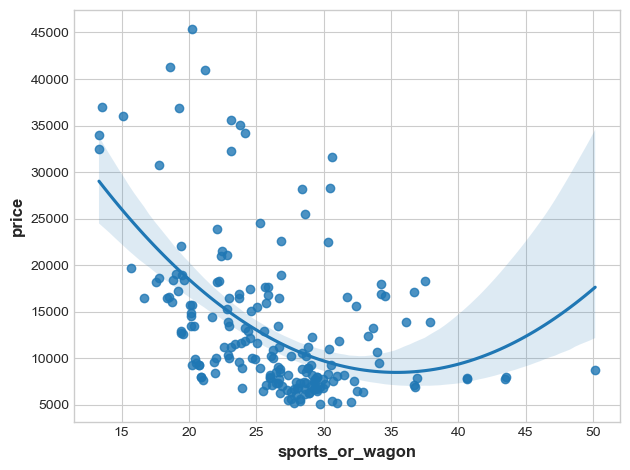

In [35]:
# Ajouter une nouvelle caractéristique
df["sports_or_wagon"] = X.curb_weight / X.horsepower

# Visualiser la relation entre cette caractéristique et le prix
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);


---
### À vous de jouer
Améliorez votre jeu de caractéristiques en décomposant la variation dans les données sur les logements d’Ames (Ames Housing) et utilisez les composantes principales pour détecter les valeurs aberrantes.

---

# EXERCICE

Dans cet exercice, nous allons explorer plusieurs applications de **l'Analyse en Composantes Principales (PCA)** sur le jeu de données **Ames**.

**Configuration du système**

In [6]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# Configuration par défaut de Matplotlib
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


**Application de la PCA**

In [9]:
def apply_pca(X, standardize=True):
    # Standardisation des données
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Création des composantes principales
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Conversion en DataFrame
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Création des charges factorielles
    loadings = pd.DataFrame(
        pca.components_.T,  # transposition de la matrice des charges factorielles
        columns=component_names,  # les colonnes sont les composantes principales
        index=X.columns,  # les lignes correspondent aux variables initiales
    )
    return pca, X_pca, loadings


**Visualisation de la variance expliquée**

In [12]:
def plot_variance(pca, width=8, dpi=100):
    # Création de la figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Variance expliquée
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Composante", title="% de Variance Expliquée", ylim=(0.0, 1.0)
    )
    # Variance Cumulative
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Composante", title="% de Variance Cumulative", ylim=(0.0, 1.0)
    )
    # Configuration de la figure
    fig.set(figwidth=8, dpi=100)
    return axs


**Calcul des Scores d'Information Mutuelle**

In [15]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # Toutes les variables discrètes doivent maintenant avoir un type entier
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


**Évaluation du modèle**

In [18]:
def score_dataset(X, y, model=XGBRegressor()):
    # Encodage des variables catégorielles
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # La métrique utilisée pour cette compétition est le RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score


**Sélection des Variables**

Nous choisissons quelques variables fortement corrélées avec notre cible SalePrice :

In [21]:
df = pd.read_csv("ames.csv")

features = [
    "GarageArea",
    "YearRemodAdd",
    "TotalBsmtSF",
    "GrLivArea",
]

print("Corrélation avec SalePrice:\n")
print(df[features].corrwith(df.SalePrice))


Corrélation avec SalePrice:

GarageArea      0.640138
YearRemodAdd    0.532974
TotalBsmtSF     0.632529
GrLivArea       0.706780
dtype: float64


Nous allons utiliser la ACP pour démêler la structure de corrélation de ces variables et identifier de nouvelles relations potentiellement utiles.

**Application de la PCA et extraction des charges factorielles**

In [25]:
X = df.copy()
y = X.pop("SalePrice")
X = X.loc[:, features]

# `apply_pca` défini ci-dessus, reproduit le code du tutoriel
pca, X_pca, loadings = apply_pca(X)
print(loadings)

                   PC1       PC2       PC3       PC4
GarageArea    0.541229 -0.102375 -0.038470  0.833733
YearRemodAdd  0.427077  0.886612 -0.049062 -0.170639
TotalBsmtSF   0.510076 -0.360778 -0.666836 -0.406192
GrLivArea     0.514294 -0.270700  0.742592 -0.332837


Nous avons préparé les données, appliqué la ACP et extrait les charges factorielles pour mieux comprendre la structure des corrélations entre les caractéristiques du logement et le prix de vente (SalePrice).

---

### Question 1 : Regardez les charges factorielles des composantes **PC1** et **PC3**. Pouvez-vous décrire le type de contraste que chacune de ces composantes a capturé ? 

**Correction :**  

- La **première composante (PC1)** semble être une sorte de **composante "taille"**, similaire à ce que nous avons vu dans le tutoriel. Toutes les caractéristiques ont le même signe (**positif**), ce qui indique que cette composante décrit un **contraste entre les maisons avec de grandes valeurs et celles avec de petites valeurs** pour ces caractéristiques.  

- L'**interprétation de la troisième composante (PC3)** est un peu plus complexe. Les variables **GarageArea** et **YearRemodAdd** ont des charges factorielles proches de zéro, nous pouvons donc les ignorer. Cette composante concerne principalement **TotalBsmtSF** et **GrLivArea**. Elle décrit un **contraste entre les maisons avec une grande surface habitable mais un sous-sol petit (ou inexistant)** et, à l'opposé, les **maisons plus petites avec un sous-sol plus grand**.  


---

### Question 2 : Création de Nouvelles Caractéristiques
Ajoutez une ou plusieurs nouvelles caractéristiques au dataset X.

Pour une solution correcte, obtenez un score de validation inférieur à 0.140 RMSLE.

In [35]:
X = df.copy()
y = X.pop("SalePrice")

# Ajoutez de nouvelles caractéristiques à X.
X["Feature1"] = X.GrLivArea + X.TotalBsmtSF
X["Feature2"] = X.YearRemodAdd * X.TotalBsmtSF

score = score_dataset(X, y)
print(f"Votre score : {score:.5f} RMSLE")

Votre score : 0.13792 RMSLE


Here are two possible solutions, though you might have been able to find others.

```
# Solution 1: Inspired by loadings
X = df.copy()
y = X.pop("SalePrice")

X["Feature1"] = X.GrLivArea + X.TotalBsmtSF
X["Feature2"] = X.YearRemodAdd * X.TotalBsmtSF

score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")


# Solution 2: Uses components
X = df.copy()
y = X.pop("SalePrice")

X = X.join(X_pca)
score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")
```

---

La prochaine question explore une méthode permettant d'utiliser l'ACP (Analyse en Composantes Principales) pour détecter **les valeurs aberrantes** dans le jeu de données (c'est-à-dire les points de données qui sont inhabituellement extrêmes d'une certaine manière). Les valeurs aberrantes peuvent nuire aux performances du modèle, il est donc important de les identifier pour éventuellement prendre des mesures correctives.

L'ACP, en particulier, peut révéler des variations anormales qui ne sont pas forcément visibles dans les caractéristiques d'origine : ni les petites maisons ni les maisons avec de grands sous-sols ne sont inhabituelles, mais *une petite maison avec un grand sous-sol l'est*. **C'est ce type de relation qu'une composante principale peut mettre en évidence**.

Exécutez la cellule suivante pour afficher les **diagrammes de distribution** de chaque composante principale que vous avez créées ci-dessus.

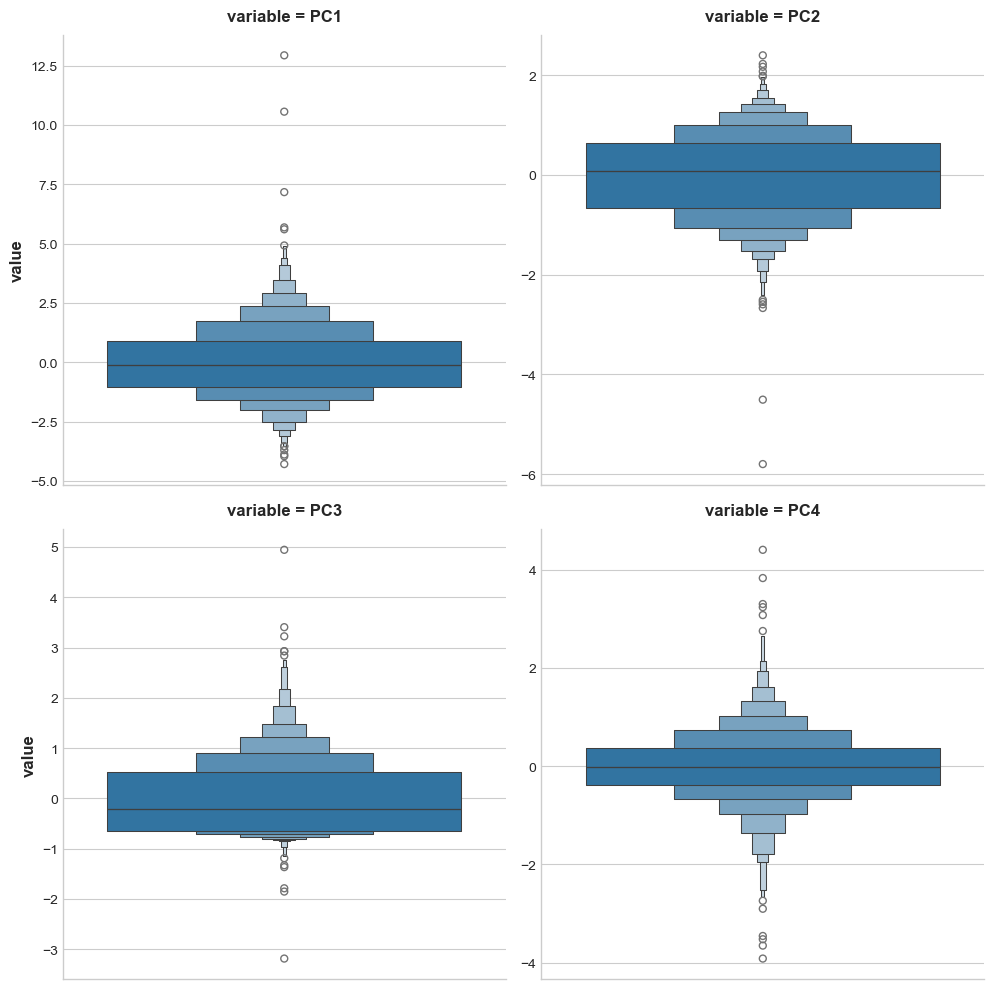

In [40]:
sns.catplot(
    y="value",
    col="variable",
    data=X_pca.melt(),
    kind='boxen',
    sharey=False,
    col_wrap=2,
);


Comme vous pouvez le voir, dans chacune des composantes, plusieurs points se situent aux extrémités des distributions — ce sont des valeurs aberrantes.

Maintenant, exécutez la cellule suivante pour voir les maisons situées aux extrêmes d'une composante :

In [43]:
# Vous pouvez remplacer PC1 par PC2, PC3 ou PC4
component = "PC1"

idx = X_pca[component].sort_values(ascending=False).index
df.loc[idx, ["SalePrice", "Neighborhood", "SaleCondition"] + features]


,SalePrice,Neighborhood,SaleCondition,GarageArea,YearRemodAdd,TotalBsmtSF,GrLivArea
1498,160000,Edwards,Partial,1418.0,2008,6110.0,5642.0
2180,183850,Edwards,Partial,1154.0,2009,5095.0,5095.0
2181,184750,Edwards,Partial,884.0,2008,3138.0,4676.0
1760,745000,Northridge,Abnorml,813.0,1996,2396.0,4476.0
1767,755000,Northridge,Normal,832.0,1995,2444.0,4316.0
...,...,...,...,...,...,...,...
662,59000,Old_Town,Normal,0.0,1950,416.0,599.0
2679,80500,Brookside,Normal,0.0,1950,0.0,912.0
2879,51689,Iowa_DOT_and_Rail_Road,Abnorml,0.0,1950,0.0,729.0
780,63900,Sawyer,Normal,0.0,1950,0.0,660.0


---

### Question 3 : Détection des valeurs aberrantes  

Remarquez-vous des tendances parmi les valeurs extrêmes ? Pensez-vous que ces valeurs aberrantes proviennent d'un sous-ensemble particulier du jeu de données ?  

**Correction :**  

On remarque que plusieurs habitations répertoriées comme **ventes partielles** dans le quartier **Edwards** se démarquent.  

Une **vente partielle** se produit lorsque plusieurs propriétaires possèdent un bien immobilier et que l’un ou plusieurs d’entre eux vendent leur part de propriété.  

Ces types de transactions ont souvent lieu lors du règlement d'une succession familiale ou de la dissolution d'une entreprise et ne sont généralement pas annoncés publiquement.  

*Si vous essayiez de prédire la valeur d’une maison sur le marché libre, il serait justifié de retirer ces ventes de votre jeu de données — ce sont de véritables valeurs aberrantes.*